In [1]:
# coding: utf-8

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import mlab
from sklearn.decomposition import PCA

In [3]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql import types as T
from pyspark.sql import functions as F
from pyspark.conf import SparkConf
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.stat import Statistics

import multiprocessing

In [4]:
# create SparkContext and SparkSession to process files
cores = multiprocessing.cpu_count() - 2

conf = SparkConf()
conf.setMaster('local[' + str(cores) + ']') \
    .setAppName('example') \
    .set('spark.serializer', 'org.apache.spark.serializer.KryoSerializer') \
    .set('spark.driver.memory', '15g')

sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [5]:
my_seed = 1980

In [6]:
# dataframe
df = spark.read.format('csv') \
               .option('sep', ',') \
               .option('header', 'True') \
               .option('inferSchema', 'True') \
               .load('../data/df.csv')
df = df.drop('id')                
# df.createOrReplaceTempView("tab_df")
df.cache()

DataFrame[.net: double, active directory: double, administracao: double, administrativo: double, ajax: double, alocacao: double, analise de codigo fonte: double, analise de requisitos: double, analise de sistemas: double, analise de vulnerabilidade: double, angular: double, apache: double, appliance: double, arquitetura: double, asp: double, asp.net: double, automatizacao de teste: double, awt: double, azure: double, banco de dados: double, big data: double, bootstrap: double, bpm: double, business intelligence: double, c: double, c#: double, c++: double, cargo_analista: double, cargo_consultor: double, cargo_engenheiro: double, cargo_estagiario: double, cargo_gerente: double, cdi: double, chef: double, cisco: double, citrix: double, cloud computing: double, cluster: double, cluster de alta disponibilidade: double, cobol: double, cognos: double, comercial: double, coreldraw: double, css: double, css 3: double, cucumber: double, curso_administracao: double, curso_computacao: double, cur

In [7]:
df_rdd = df.rdd.map(tuple)

In [9]:
pearsonCorr = Statistics.corr(df_rdd)

print(pearsonCorr)

[[ 1.          0.01219592  0.09476718 ..., -0.00757169  0.19383587
   0.26374677]
 [ 0.01219592  1.          0.13687036 ..., -0.00233921 -0.0093001
   0.05714101]
 [ 0.09476718  0.13687036  1.         ...,  0.0615546   0.02255741
   0.04015108]
 ..., 
 [-0.00757169 -0.00233921  0.0615546  ...,  1.         -0.0019112
  -0.00391916]
 [ 0.19383587 -0.0093001   0.02255741 ..., -0.0019112   1.          0.26810086]
 [ 0.26374677  0.05714101  0.04015108 ..., -0.00391916  0.26810086  1.        ]]


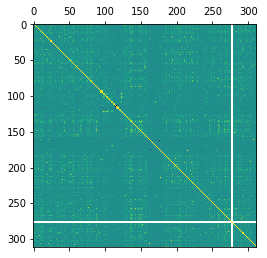

In [10]:
plt.matshow(pearsonCorr)
plt.show()

In [11]:
# verificando correlacao entre variaveis explicativas e alvo
corr_pd = pd.DataFrame(pearsonCorr, columns=df.columns)
np.abs(corr_pd['label']).sort_values(ascending=False)[:15]

154    1.000000
284    0.090095
56     0.075716
72     0.067099
157    0.065919
8      0.064961
19     0.060343
229    0.058560
0      0.051615
189    0.051336
41     0.049949
239    0.049307
3      0.049157
252    0.047374
238    0.047237
Name: label, dtype: float64

In [26]:
df.columns[275:278]

['tem_familia', 'tem_lugar_nasc', 'tem_website']

In [28]:
df.tem_familia

TypeError: 'Column' object is not callable